# 1. Preprocessing

In [1]:
import pandas as pd
import numpy as np

marketing_df = pd.read_csv('marketing_campaign.csv', delimiter='\t')
marketing_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [2]:
def preprocessing():
    # I drop both of these columns because they both just have the same value in every single row
    marketing_df = pd.read_csv('marketing_campaign.csv', delimiter='\t')

    # dropping columns that have the same value for each row
    marketing_df = marketing_df.drop('Z_CostContact', axis=1)
    marketing_df = marketing_df.drop('Z_Revenue', axis=1)
    
    # mapping education column and one hot encoding marital status
    marketing_df['Education'] = marketing_df['Education'].map({'Basic':1, '2n Cycle':2,'Master':3,'PhD':4,'Graduation':5})
    marketing_df = pd.get_dummies(data=marketing_df, columns=['Marital_Status'])
    marketing_df = marketing_df.replace({False: 0, True: 1})
    
    # setting the null values to mean
    marketing_df['Income'] = marketing_df['Income'].fillna(marketing_df['Income'].mean())

    # splitting the datetime column up into three columns, year, month, and day
    marketing_df['Dt_Customer'] = marketing_df['Dt_Customer'].astype('datetime64[us]')
    marketing_df['Dt_Customer_Year'] = marketing_df['Dt_Customer'].dt.year
    marketing_df['Dt_Customer_Month'] = marketing_df['Dt_Customer'].dt.month
    marketing_df['Dt_Customer_Day'] = marketing_df['Dt_Customer'].dt.day
    marketing_df['Dt_Customer_Year'] = marketing_df['Dt_Customer_Year'].astype(int)
    marketing_df['Dt_Customer_Month'] = marketing_df['Dt_Customer_Month'].astype(int)
    marketing_df['Dt_Customer_Day'] = marketing_df['Dt_Customer_Day'].astype(int)
    
    marketing_df = marketing_df.drop('ID', axis=1)
    
    # dropping the original datetime column
    marketing_df = marketing_df.drop('Dt_Customer', axis=1)
    return marketing_df

    
# sets the df to what the function does
marketing_df = preprocessing()

marketing_df

C:\Users\cjcra\AppData\Local\Temp\ipykernel_18160\1479547044.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  marketing_df = marketing_df.replace({False: 0, True: 1})


,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Dt_Customer_Year,Dt_Customer_Month,Dt_Customer_Day
0,1957,5,58138.0,0,0,58,635,88,546,172,...,0,0,0,1,0,0,0,2012,4,9
1,1954,5,46344.0,1,1,38,11,1,6,2,...,0,0,0,1,0,0,0,2014,8,3
2,1965,5,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,1,0,0,2013,8,21
3,1984,5,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,1,0,0,2014,10,2
4,1981,4,58293.0,1,0,94,173,43,118,46,...,0,0,1,0,0,0,0,2014,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,5,61223.0,0,1,46,709,43,182,42,...,0,0,1,0,0,0,0,2013,6,13
2236,1946,4,64014.0,2,1,56,406,0,30,0,...,0,0,0,0,1,0,0,2014,10,6
2237,1981,5,56981.0,0,0,91,908,48,217,32,...,0,1,0,0,0,0,0,2014,1,25
2238,1956,3,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,1,0,0,2014,1,24


In [3]:
# # I drop both of these columns because they both just have the same value in every single row
# marketing_df = marketing_df.drop('Z_CostContact', axis=1)
# marketing_df = marketing_df.drop('Z_Revenue', axis=1)



In [4]:
marketing_df['Response'].value_counts()

Response
0    1906
1     334
Name: count, dtype: int64

In [5]:
# marketing_df['Education'] = marketing_df['Education'].map({'Basic':1, '2n Cycle':2,'Master':3,'PhD':4,'Graduation':5})

In [6]:
# marketing_df = pd.get_dummies(data=marketing_df, columns=['Marital_Status'])
# marketing_df = marketing_df.replace({False: 0, True: 1})

In [7]:
# marketing_df['Income'] = marketing_df['Income'].fillna(marketing_df['Income'].mean())

In [8]:
marketing_df.head()

,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Dt_Customer_Year,Dt_Customer_Month,Dt_Customer_Day
0,1957,5,58138.0,0,0,58,635,88,546,172,...,0,0,0,1,0,0,0,2012,4,9
1,1954,5,46344.0,1,1,38,11,1,6,2,...,0,0,0,1,0,0,0,2014,8,3
2,1965,5,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,1,0,0,2013,8,21
3,1984,5,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,1,0,0,2014,10,2
4,1981,4,58293.0,1,0,94,173,43,118,46,...,0,0,1,0,0,0,0,2014,1,19


In [9]:
# marketing_df['Dt_Customer'] = marketing_df['Dt_Customer'].astype('datetime64[us]')
# marketing_df['Dt_Customer_Year'] = marketing_df['Dt_Customer'].dt.year
# marketing_df['Dt_Customer_Month'] = marketing_df['Dt_Customer'].dt.month
# marketing_df['Dt_Customer_Day'] = marketing_df['Dt_Customer'].dt.day
# marketing_df['Dt_Customer_Year'] = marketing_df['Dt_Customer_Year'].astype(int)
# marketing_df['Dt_Customer_Month'] = marketing_df['Dt_Customer_Month'].astype(int)
# marketing_df['Dt_Customer_Day'] = marketing_df['Dt_Customer_Day'].astype(int)
# marketing_df = marketing_df.drop('Dt_Customer', axis=1)

When preprocessing this dataset, I handled the only nulls, which were in the income column, by replacing them with the mean. I used mapping for the education column, and one hot encoding for marital status. In addition, I split up the date time of the customer into year, month, and day, and fixed the type of those columns. I also dropped two columns that had the same value for every row, and I dropped the ID column.

# 2. Perform k-means

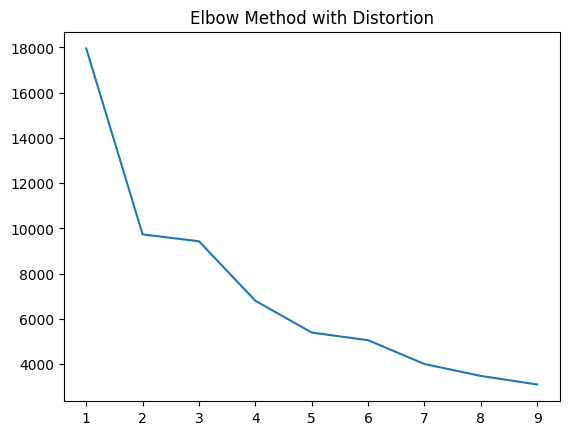

In [23]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

def k_means_clustering(plot):
    X = marketing_df.drop('Response', axis=1)
    y = marketing_df['Response']

    inertias = []
    distortions = []

    for k in range(1,10):
        model = KMeans(n_clusters=k).fit(X)
        
        distance = cdist(X, model.cluster_centers_, 'euclidean')
        distortion = sum(np.min(distance, axis=1))/X.shape[0]
        distortions.append(distortion)
        
        inertia = model.inertia_
        inertias.append(inertia)
    if plot == 'distortion':
        plt.plot(range(1,10), distortions)
        plt.title('Elbow Method with Distortion')
    elif plot == 'inertia':
        plt.plot(range(1,10), inertias)
        plt.title('Elbow Method with Inertia')
        
k_means_clustering('distortion')


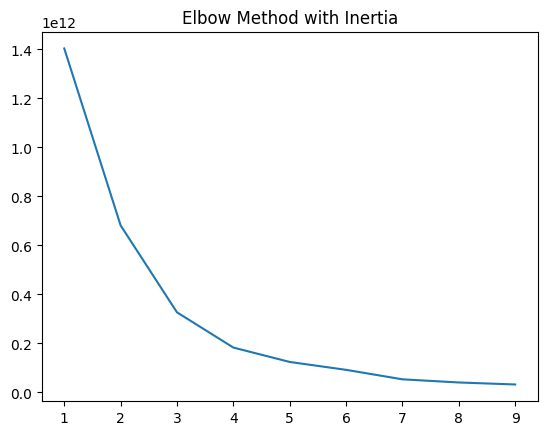

In [24]:
k_means_clustering('inertia')

When performing K-Means I looked at the entirety of the data, rather than a subset of it. This is because I think most of this plays a part in this and can be used to group these people. Looking at both of these elbow methods, it looks like the ideal number of clusters is around four. 

# 3. Hierarchical

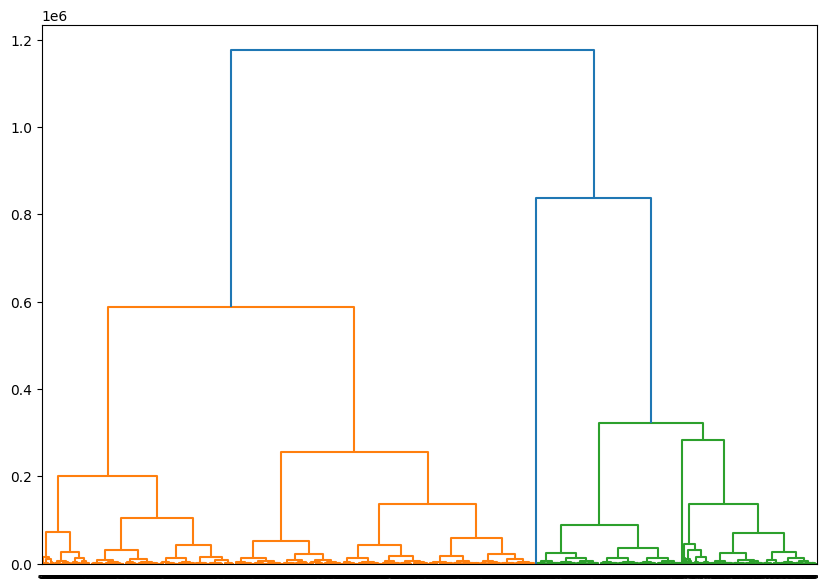

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

def hierarchical():
    X = marketing_df.drop('Response', axis=1)
    y = marketing_df['Response']
    linked = linkage(X, 'ward')
    plt.figure(figsize=(10,7))

    dendro = dendrogram(linked, labels = list(y))
    
hierarchical()

Like the k-means clustering, this hierarchical clustering also appears to show four clusters. You can pretend to draw a line from just under where the orange part splits off and that imaginary line would intersect four times with lines.

# 4. Comparing Results

I think that both methods were pretty suitable in helping me determine the best amount of clusters. They both show around 4 clusters.

When looking at both of them, I think that hierarchical clustering is the better choice. This is because when using k-means clustering with distortion, it could potentially be 3 clusters and it with inertia shows it closer to 4. The hierarchical is pretty clear cut 4. K-means clustering can be better though if you really want to see something that works well with both.